In [ ]:
import jieba
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib

In [13]:
#将读取到的.xlsx文件转化为dataframe，并将第一列用作索引

df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [14]:
def clean_text(text): #定义预处理函数
    words = jieba.lcut(text)
    return ' '.join(words) #将分词结果通过空格连成长字符串

test = df['广告文本'][0] #从广告文本中取出第一行用作测试
clean_text(test) #将预处理步骤应用于广告文本第一行的内容

'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [15]:
#在Dataframe中添加新的一列，内容为广告文本预处理后的内容，并命名为“广告文本分词”
df['广告文本分词'] = df['广告文本'].apply(clean_text) 
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


In [16]:
#是一个包含了多个示例文本的列表，即一个列表的列表，一级列表中的元素为二级列表，二级列表的元素为一个或多个单词

common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [19]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() #构建语料库，将每个文本字符串即广告文本分词的内容根据空格分割，形成由词语构成的列表 
for document in corpus[:5]: #corpus为一个以分词结果列表为元素的列表，显示列表的前5个元素
    print(document) 

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [20]:
model = Word2Vec(corpus,window = 5, vector_size = 100, min_count = 1, epochs = 10) 
'''创建Word2Vec模型对象
训练数据为corpus
当前词与预测词在一个训练样本中的最大距离设定为5
每个词的维度设定为100，即将每个词转化为100维向量
词频低于1的词语会被忽略不进行训练，即只要出现，都会被纳入训练
整个训练数据集会被遍历10次进行模型训练
'''
model.save('word2vec_ad.model') #将训练好的模型保存到名为'word2vec_ad.model'的文件中

In [21]:
word_list = model.wv.index_to_key #获取了训练好的Word2Vec模型中所有词语的列表，返回词向量模型中所有词语的索引组成的列表
word_vectors = model.wv[word_list] #通过word_list列表获取了所有词语对应的词向量，返回一个包含所有词向量的二维数组，其中每一行代表一个词语的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]: #将词语列表和对应的词向量数组进行打包，然后遍历前五个打包后的元组
    print(f'{word}: {vector}') #用字符串格式打印词语及其词向量

之: [-7.27519333e-01  1.00805199e+00  4.61805940e-01 -2.13643283e-01
 -3.86843383e-01 -2.30910468e+00  7.36027241e-01  2.94900107e+00
 -1.07709205e+00 -1.19128394e+00 -5.81447423e-01 -1.99293447e+00
 -3.38434339e-01  1.29241562e+00  5.67872524e-01 -5.46635091e-01
  4.23229247e-01 -5.85471392e-01 -2.10407332e-01 -2.19508862e+00
  1.09382200e+00 -2.76954821e-03  6.26047671e-01 -7.14675307e-01
 -5.52470237e-02  3.32435042e-01 -3.82478446e-01 -7.86512017e-01
 -1.06688499e+00 -1.13139406e-01  1.13919246e+00  5.43229222e-01
  3.88699681e-01 -7.62135148e-01 -6.81989789e-01  1.75600016e+00
  5.23254752e-01 -1.06840968e+00 -1.02228773e+00 -2.30571008e+00
  8.35802108e-02 -7.09474742e-01 -1.87947258e-01 -9.01909232e-01
  1.10205090e+00 -7.95508027e-01 -1.44690585e+00  4.52927172e-01
  1.29501057e+00  6.84352994e-01  4.64368254e-01 -4.84463722e-01
 -6.81574464e-01 -1.15729593e-01 -5.87795556e-01  1.10487688e+00
  1.48603797e-01  1.66252643e-01 -5.26858211e-01  4.04601485e-01
  3.45200330e-01  4.45

**wv的一些常见方法和属性**
- index_to_key：返回词向量模型中所有词语的索引（唯一标识符）组成的列表。
- key_to_index：返回词向量模型中所有词语到索引的映射，是index_to_key的逆操作。
- get_vector(word)：根据词语获取对应的词向量。
- get_vector_by_key(key)：根据索引获取对应的词向量。
- similarity(word1, word2)：计算两个词语之间的余弦相似度。
- most_similar(positive=None, negative=None, topn=10)：查找最相似的词语。
- similar_by_vector(vector, topn=10)：根据给定的词向量查找最相似的词语。
- vectors：返回所有词向量组成的二维数组。
- save_word2vec_format(fname)：将词向量模型保存为Word2Vec的文本格式文件。
- load_word2vec_format(fname)：从Word2Vec的文本格式文件中加载词向量模型。

In [22]:
'''
model.wv.similarity(word1,word2)是指两个词向量的余弦相似度，即表示两个词的相似程度
取之在-1到1之间，-1表示完全不相关（如语义相反），1表示完全相关，0表示没有关系
'''
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.72918737
0.69566166
0.6453279
0.99355996
0.98914266
0.9936169


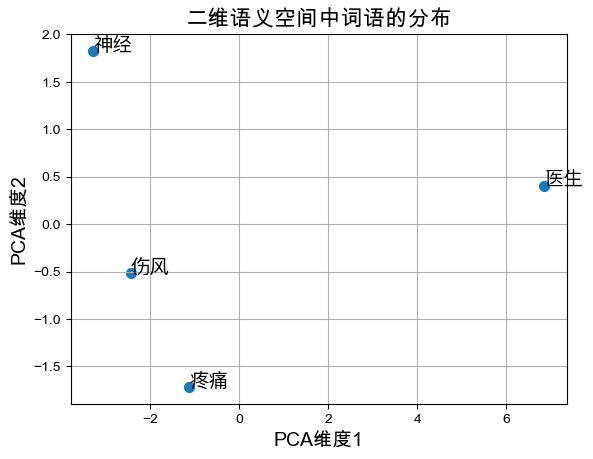

In [23]:
words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words] #使用Word2Vec模型获取词语的词向量，并存储在vectors列表中

from matplotlib.font_manager import FontProperties
font_path = '/System/Library/Fonts/PingFang.ttc' 
custom_font = FontProperties(fname=font_path, size=14)

matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 

pca = PCA(n_components=2) #创建了一个PCA对象，指定将词向量降维到2维
pca_result = pca.fit_transform(vectors) #利用PCA对象对词向量进行降维处理，得到降维后的结果

plt.figure()

plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50) #绘制散点图，表示降维后的第一维度和第二维度

for i, word in enumerate(words): #遍历词语列表
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=14, fontproperties=custom_font) #利用annotate方法在散点图中添加文本标签，定义文本标签的位置

plt.xlabel('PCA维度1', fontsize=14)
plt.ylabel('PCA维度2', fontsize=14)
plt.title('二维语义空间中词语的分布', fontsize=16)
plt.grid(True) #在图表中显示网格线
plt.show()

In [24]:
#回调函数用于在Word2Vec模型训练过程中进行回调操作，可以自定义一些回调函数，可以记录训练过程中的指标、保存模型、可视化训练进度等等
from gensim.models.callbacks import CallbackAny2Vec

#定义一个类，继承自CallbackAny2Vec类，用于在每个epoch结束时打印损失值
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
        #用于记录当前的epoch数和上一个epoch结束时的损失值

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        '''
        首先获取当前epoch的损失值，并计算与上一个epoch结束时的损失值的差
        然后更新loss_to_be_subed为当前epoch的损失值，并打印出当前epoch的损失值以及对应的epoch数。
        '''
        
'''
返回的损失值可以反映模型在每个epoch结束时的训练效果，如果损失值在训练过程中逐渐减小，则表示模型在学习任务上取得了进展。
'''
from gensim.models import Word2Vec

model = Word2Vec(
    corpus,
    window = 5,
    vector_size = 100, 
    min_count = 1, 
    compute_loss=True,  
    callbacks=[callback()],epochs = 50 #callbacks=[callback()] 将之前定义的回调函数 callback() 加入到模型训练中，用于监控损失值。
)

model.save('word2vec_ad.model')

Loss after epoch 0: 70002.34375
Loss after epoch 1: 69581.015625
Loss after epoch 2: 64763.71875
Loss after epoch 3: 54839.75
Loss after epoch 4: 48831.046875
Loss after epoch 5: 45679.875
Loss after epoch 6: 43885.5625
Loss after epoch 7: 42411.0625
Loss after epoch 8: 41148.8125
Loss after epoch 9: 39886.25
Loss after epoch 10: 38765.4375
Loss after epoch 11: 37768.5625
Loss after epoch 12: 36493.6875
Loss after epoch 13: 35390.5
Loss after epoch 14: 34680.875
Loss after epoch 15: 33467.625
Loss after epoch 16: 32611.875
Loss after epoch 17: 35412.25
Loss after epoch 18: 30919.5625
Loss after epoch 19: 30041.0625
Loss after epoch 20: 32689.1875
Loss after epoch 21: 28651.5
Loss after epoch 22: 31173.875
Loss after epoch 23: 26418.375
Loss after epoch 24: 26785.25
Loss after epoch 25: 26333.25
Loss after epoch 26: 25642.5625
Loss after epoch 27: 24868.875
Loss after epoch 28: 27208.125
Loss after epoch 29: 26548.375
Loss after epoch 30: 23744.25
Loss after epoch 31: 25904.875
Loss aft